# **Project Name**    -  Smart City Traffic Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset

test_df = pd.read_csv("test.csv")
train_df= pd.read_csv("train.csv")



### Dataset First View

In [3]:
# Dataset First Look

train_df.head(3)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 0.00,1,15,20151101001
1,01-11-2015 1.00,1,13,20151101011
2,01-11-2015 2.00,1,10,20151101021


In [4]:
train_df.head(2)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 0.00,1,15,20151101001
1,01-11-2015 1.00,1,13,20151101011


In [5]:
test_df.head(2)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011


### Dataset Rows & Columns count

In [6]:
train_df.shape

(48120, 4)

In [7]:
test_df.shape

(11808, 3)

In [8]:
# Dataset Rows & Columns count (For Train Dataset)

print(f"Number Of Rows {train_df.shape[0]}")
print(f"Number Of Columns {train_df.shape[1]}")


Number Of Rows 48120
Number Of Columns 4


In [9]:
# Dataset Rows & Columns count (For Test Dataset)

print(f"Number Of Rows {test_df.shape[0]}")
print(f"Number Of Columns {test_df.shape[1]}")


Number Of Rows 11808
Number Of Columns 3


### Dataset Information

In [10]:
# Dataset Info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count ( For Train Dataset)

num_duplicates = train_df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


In [13]:
# Dataset Duplicate Value Count ( For Test Dataset)

num_duplicates = test_df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count ( For Train Dataset)

num_missing = train_df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [15]:
# Missing Values/Null Values Count ( For Test Dataset)

num_missing = test_df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 DateTime    0
Junction    0
ID          0
dtype: int64


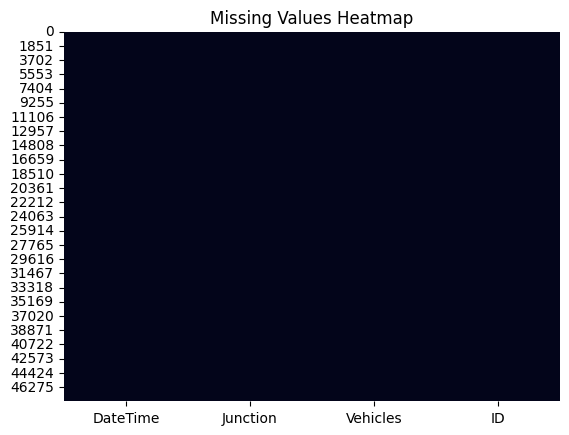

In [16]:
# Visualizing the missing values ( For Train Dataset)

sns.heatmap(train_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

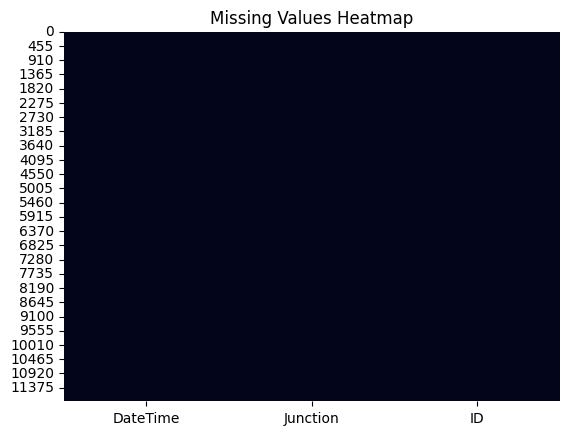

In [17]:
# Visualizing the missing values ( For Test Dataset)

sns.heatmap(test_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  48120 Number of  Rows and 4 Numbers of Columns Present in my Train dataset.**

**There are  11808 Number of  Rows and 3 Numbers of Columns Present in my Test dataset.**

**There are 3 Numerical Columns and 1 Categorical Columns Present in my Train Dataset**

**There are 2 Numerical Columns and 1 Categorical Columns Present in my Train Dataset**

**There are No Missing Values in my Train and Test Dataset.**

**There are No Duplicate Values in my  Train and Test Dataset.**


## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns

train_df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [19]:
# Dataset Describe

train_df.describe(include='all')

,DateTime,Junction,Vehicles,ID
count,48120,48120.000000,48120.000000,4.812000e+04
unique,14592,NaN,NaN,NaN
top,30-06-2017 23.00,NaN,NaN,NaN
freq,4,NaN,NaN,NaN
mean,NaN,2.180549,22.791334,2.016330e+10
std,NaN,0.966955,20.750063,5.944854e+06
min,NaN,1.000000,1.000000,2.015110e+10
25%,NaN,1.000000,9.000000,2.016042e+10
50%,NaN,2.000000,15.000000,2.016093e+10
75%,NaN,3.000000,29.000000,2.017023e+10


### Variables Description 

**DateTime:** This is a datetime variable representing the date and time, likely in hourly intervals.

**Junction:** This is a categorical variable that seems to represent an identifier for a specific location or intersection.

**Vehicles:** This is a numerical variable representing the number of vehicles at the given DateTime and Junction.

**ID:** This is a unique identifier for each row in the dataset.

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.

for i in train_df.columns.tolist():
  print("No. of unique values in ",i,"is",train_df[i].nunique(),".")

No. of unique values in  DateTime is 14592 .
No. of unique values in  Junction is 4 .
No. of unique values in  Vehicles is 141 .
No. of unique values in  ID is 48120 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
# Convert 'DateTime' column to datetime type with specified format

train_df['DateTime'] = pd.to_datetime(train_df['DateTime'], format='%d-%m-%Y %H.%M')
test_df["DateTime"]=pd.to_datetime(test_df["DateTime"])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [33]:
train_df["Day"]= train_df["DateTime"].dt.strftime("%A")
train_df['Month'] = train_df['DateTime'].dt.month
train_df['Year'] = train_df['DateTime'].dt.year
train_df["Hour"] = train_df["DateTime"].dt.hour


In [34]:
train_df.head()

,DateTime,Junction,Vehicles,ID,Day,Month,Year,Hour
0,2015-11-01 00:00:00,1,15,20151101001,Sunday,11,2015,0
1,2015-11-01 01:00:00,1,13,20151101011,Sunday,11,2015,1
2,2015-11-01 02:00:00,1,10,20151101021,Sunday,11,2015,2
3,2015-11-01 03:00:00,1,7,20151101031,Sunday,11,2015,3
4,2015-11-01 04:00:00,1,9,20151101041,Sunday,11,2015,4


### What all manipulations have you done and insights you found?

Extracted the day of the week from the DateTime column and added it as a new column named "Day".

Extracted the month from the DateTime column and added it as a new column named "Month".

Extracted the year from the DateTime column and added it as a new column named "Year".

Extracted the hour from the DateTime column and added it as a new column named "Hour".

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
test_df.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


<Axes: xlabel='Junction', ylabel='count'>

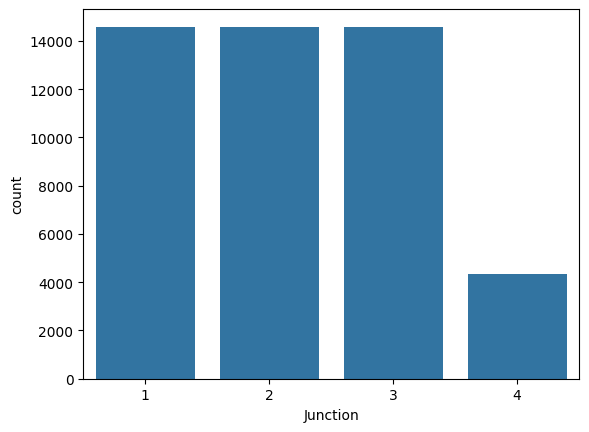

In [ ]:
# Chart - 1 visualization code

sns.countplot(data=train_df,x=train_df["Junction"])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***